In [21]:
from utils import *

In [22]:
# import data
snakemake_contigs = SeqIO.to_dict(SeqIO.parse('../../data/contigs/contigs_non_cellular_filtered.fasta', "fasta"))

# extract contig names and lengths
df = pd.DataFrame({
    'contig_name': list(snakemake_contigs.keys()),
    'contig_length': [len(str(record.seq)) for record in snakemake_contigs.values()]
})

# extract contig lengths as a list
sample = df['contig_length'].to_list()

Fit a curve to contig_length distribution

[630.08666667 678.26       726.43333333] [0.00138389 0.00138389 0.00089546]
[ 8.22319112e-03  3.08986477e-03 -1.93895916e-08  1.63621529e-04]
range(600, 603) [0.00143992 0.00143593 0.00143195]
range(7998, 8001) [8.54357524e-06 8.52418564e-06 8.50479605e-06]
y_fitted: [0.00143992 0.00143593 0.00143195] [8.54357524e-06 8.52418564e-06 8.50479605e-06]
sum: 1.0113724538511488
y_fitted: [0.00142373 0.00141978 0.00141585] [8.44750636e-06 8.42833480e-06 8.40916323e-06]
sum: 0.999999999999994


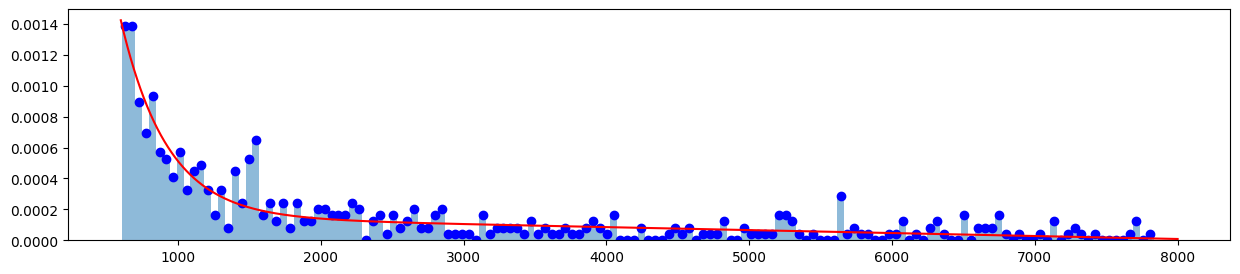

In [23]:
# bin the data
bins = 150
ydata, bin_edges = np.histogram(sample, bins=bins, density=True)
xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
print(xdata[:3], ydata[:3])

# fit function to binned data
def func2(x, a, b, c, d):
    return a * np.exp(-b * x) + c*x + d

p0 = [4, 0.002, -0.0001, 0.001]  # initial guess for parameters
popt, pcov = curve_fit(func2, xdata, ydata, p0=p0, maxfev=10000)
print(popt)

# fit to needed range
xfine = range(600, 8000+1)
y_fitted = func2(xfine, *popt)  # popt[0], popt[1], popt[2])

# xfine and y-fitted to be used for weighted sampling
print(xfine[:3], y_fitted[:3])
print(xfine[-3:], y_fitted[-3:])

print('y_fitted:', y_fitted[:3], y_fitted[-3:])
print('sum:', sum(y_fitted))

# make sure it sums to 1.0
y_fitted /= sum(y_fitted)
print('y_fitted:', y_fitted[:3], y_fitted[-3:])
print('sum:', sum(y_fitted))

# plot the data
plt.figure(figsize=(15, 3))
plt.hist(sample, bins=bins, density=True, alpha=0.5)
plt.plot(xdata, ydata, 'bo')

# plot the fitted function
plt.plot(xfine, y_fitted, 'r-')

# Create a dictionary from two equally long lists: xfine and y_fitted
xy_dict = dict(zip(xfine, y_fitted))

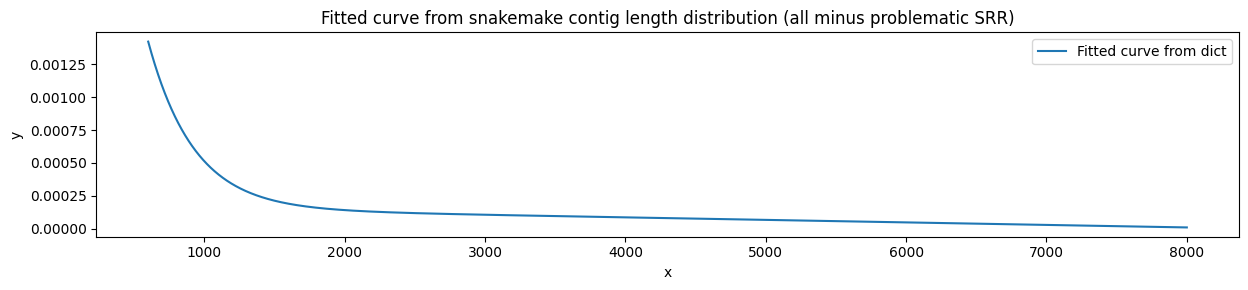

In [24]:
# Plot the dictionary: keys as x, values as y
fig, ax = plt.subplots(figsize=(12.5, 3))
ax.plot(list(xy_dict.keys()), list(xy_dict.values()), label='Fitted curve from dict')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted curve from snakemake contig length distribution (all minus problematic SRR)')
plt.legend()
plt.tight_layout()
plt.show()

export dictionary of frequences for sampling

In [25]:
os.makedirs('results/training/sampling', exist_ok=True)
# mpu.io.write('results/training/sampling/fitted_curve_lens_freq.json', xy_dict) # use this for sampling

### Checkup after sampling step

- 00_sample_refs.py results in sampled contigs of reference genomes. 
- compare the curve used for sampling and a curve fitted to the contig length distribution after reference genomes sampling

In [26]:
# xy_dict = mpu.io.read('../results/training/sampling/fitted_curve_lens_freq.json')

In [27]:
## import sampled contigs
# sampled_contigs = SeqIO.to_dict(SeqIO.parse('/home/tobamo/analize/model-tobamo/notebooks/MODEL4/results/training/sampling/2025-06-11_sampled_contigs_30.fasta', "fasta"))

sampled_contigs = SeqIO.to_dict(SeqIO.parse('/home/tobamo/analize/project-tobamo/analysis/model/results/training/sampling/2025-07-11_sampled_contigs_30.fasta', "fasta"))

# extract contig names and lengths
df = pd.DataFrame({
    'contig_name': list(sampled_contigs.keys()),
    'contig_length': [len(str(record.seq)) for record in sampled_contigs.values()]
})

new_sample = df['contig_length'].to_list()

[622.08666667 666.26       710.43333333] [0.00153335 0.00120133 0.00108663]
[ 8.22447690e-03  3.00498794e-03 -2.52636656e-08  1.81752815e-04]


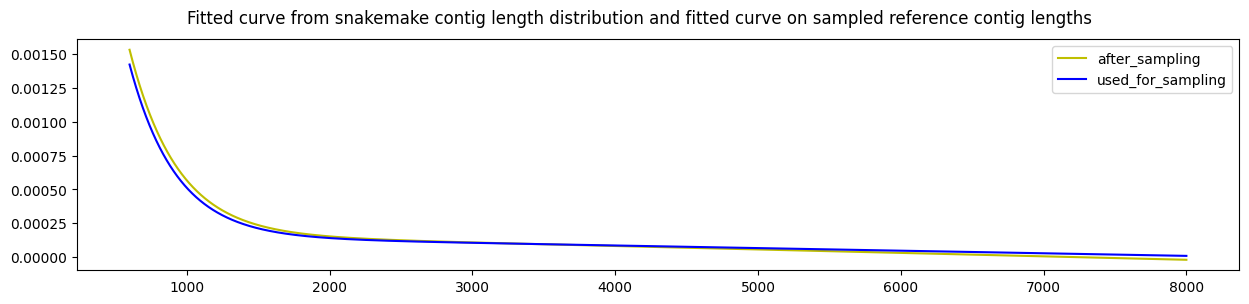

In [28]:
# bin the data
bins = 150
ydata, bin_edges = np.histogram(new_sample, bins=bins, density=True)
xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
print(xdata[:3], ydata[:3])

# fit function to binned data
def func2(x, a, b, c, d):
    return a * np.exp(-b * x) + c*x + d

p0 = [7.93139545e-03, 3.05621468e-03, -1.81668155e-08, 1.58731686e-04]  # initial guess for parameters
popt, pcov = curve_fit(func2, xdata, ydata, p0=p0, maxfev=10000)
print(popt)

# fit to needed range
xfine = range(600, 8000+1)
sample_y_fitted = func2(xfine, *popt)  # popt[0], popt[1], popt[2])
# make sure it sums to 1.0
sample_y_fitted /= sum(sample_y_fitted)

# plot the data
plt.figure(figsize=(15, 3))

# plot the fitted function
plt.plot(xfine, sample_y_fitted, 'y-', label='after_sampling')
plt.plot(xfine, y_fitted, 'b-', label='used_for_sampling')
plt.suptitle('Fitted curve from snakemake contig length distribution and fitted curve on sampled reference contig lengths')


# # Option 1: More concise but still informative
# plt.suptitle('Comparison of Contig Length Distributions: Original vs Sampled')

# # Option 2: More technical but precise
# plt.suptitle('Fitted Length Distributions: Input Contigs vs Reference Samples')

# # Option 3: Clearer purpose-oriented title
# plt.suptitle('Sampling Quality Check: Original vs Resulting Length Distributions')

# # Option 4: Most concise
# plt.suptitle('Contig Length Distribution: Before vs After Sampling')


plt.legend()
plt.show()

In [29]:
# Create a dictionary from two equally long lists: xfine and y_fitted
xy_dict_sampled = dict(zip(xfine, sample_y_fitted))
mpu.io.write('results/training/sampling/fitted_curve_lens_freq_sampled.json', xy_dict_sampled)

{600: np.float64(0.0015329224113117246),
 601: np.float64(0.0015288009086661296),
 602: np.float64(0.0015246916961508385),
 603: np.float64(0.0015205947368895929),
 604: np.float64(0.00151650999411678),
 605: np.float64(0.0015124374311771007),
 606: np.float64(0.00150837701152524),
 607: np.float64(0.001504328698725536),
 608: np.float64(0.001500292456451652),
 609: np.float64(0.0014962682484862466),
 610: np.float64(0.0014922560387206484),
 611: np.float64(0.0014882557911545286),
 612: np.float64(0.001484267469895577),
 613: np.float64(0.0014802910391591775),
 614: np.float64(0.001476326463268085),
 615: np.float64(0.0014723737066521033),
 616: np.float64(0.001468432733847763),
 617: np.float64(0.0014645035094980022),
 618: np.float64(0.0014605859983518488),
 619: np.float64(0.0014566801652640979),
 620: np.float64(0.0014527859751949984),
 621: np.float64(0.0014489033932099354),
 622: np.float64(0.001445032384479113),
 623: np.float64(0.0014411729142772437),
 624: np.float64(0.0014373